**FUNDAMENTOS DE LA INTELIGENCIA ARTIFICIAL**

**Búsqueda en espacio de soLuciones**

**2023-2**

**Laboratorio 1/3**

####**1. REVISANDO ALGORITMOS.**

**A.** Búsqueda sin adversario: algoritmo A - A*.
Considerando el algoritmo genérico de búsqueda y el espacio de búsqueda de ejemplo.
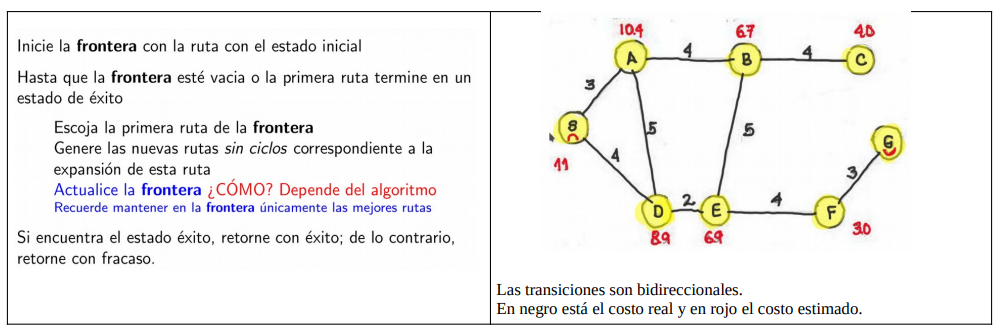

- Usando A, presente el estado de la frontera en cada uno de los pasos del algoritmo.
- ¿Cuál es la solución encontrada? ¿Es la óptima? ¿Es A*? Justifiquen.

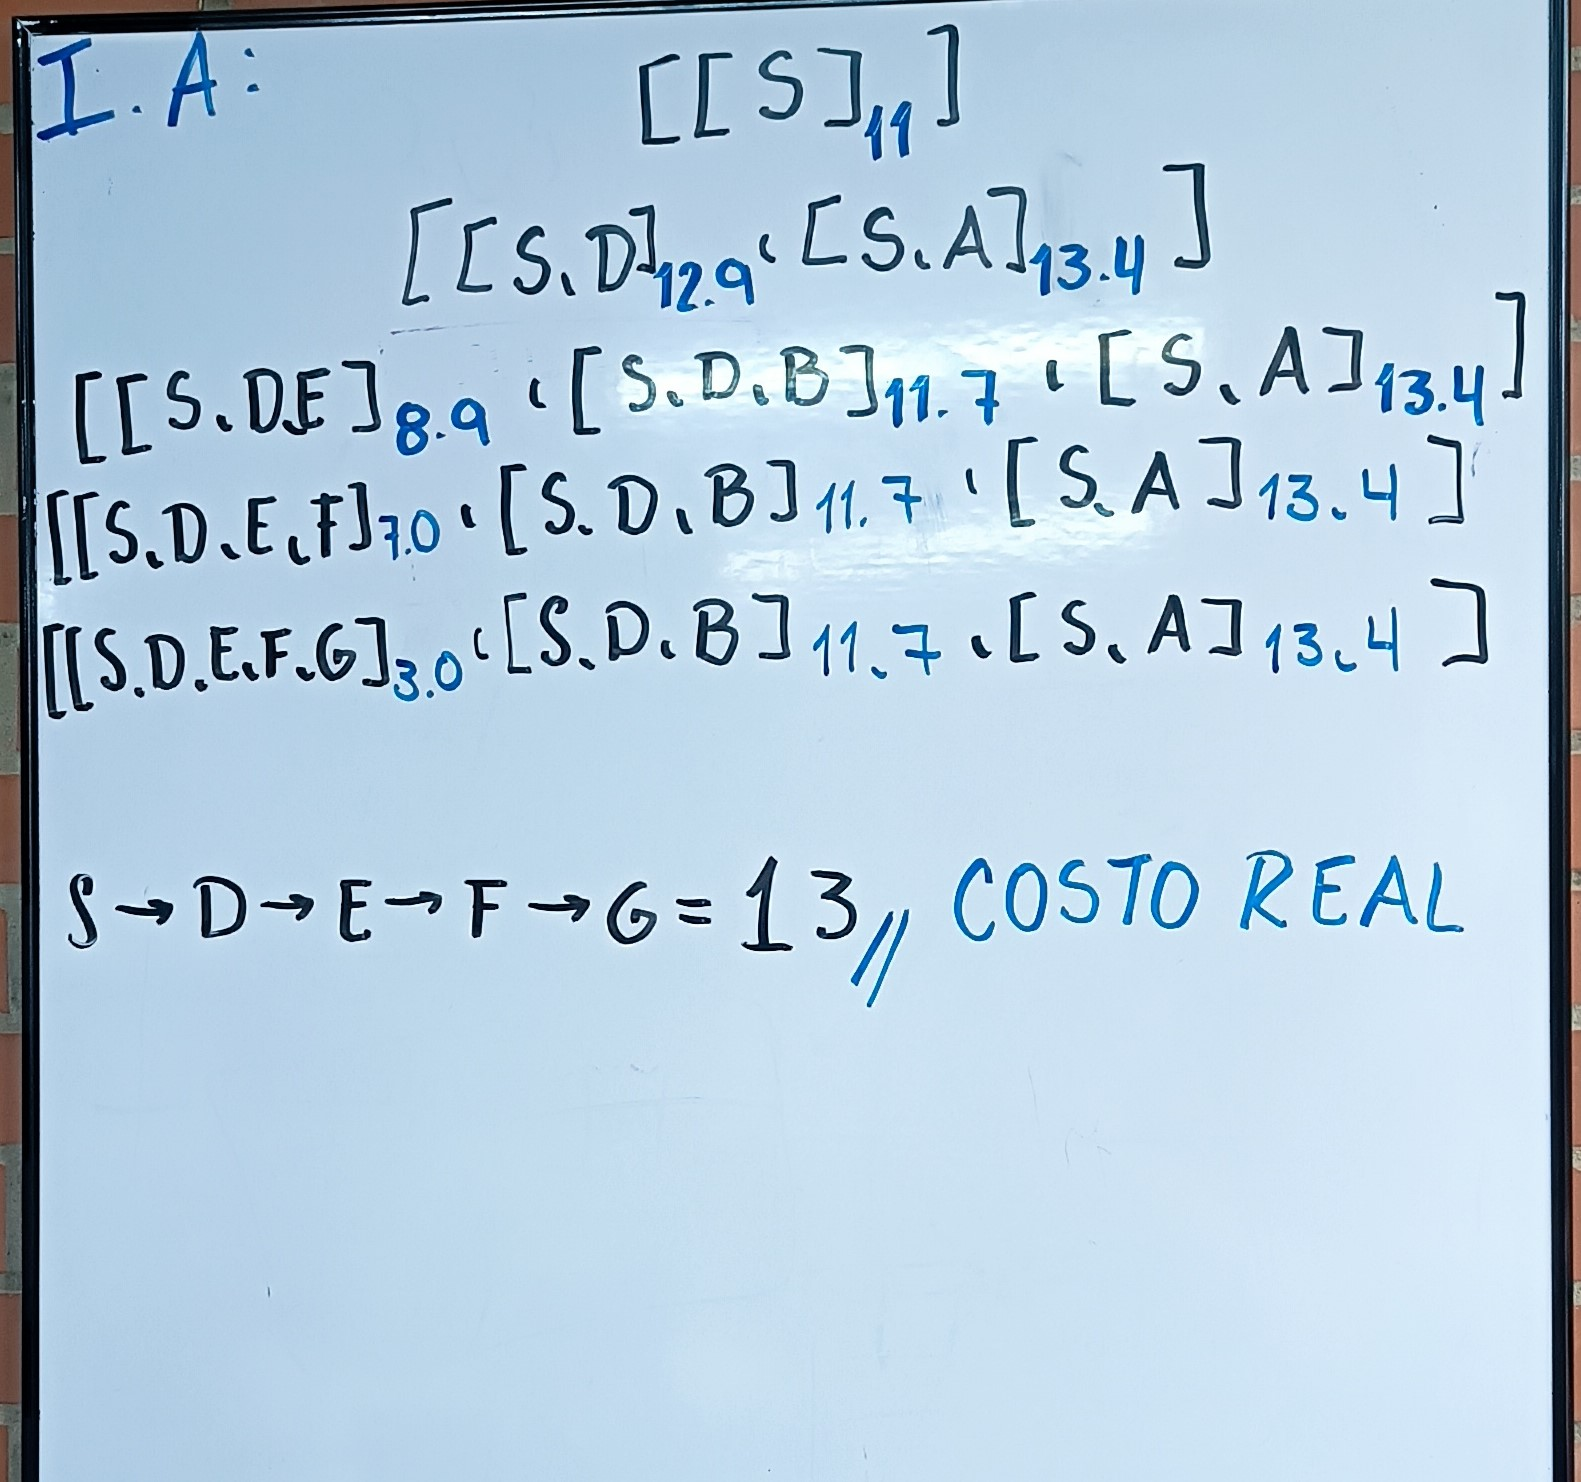

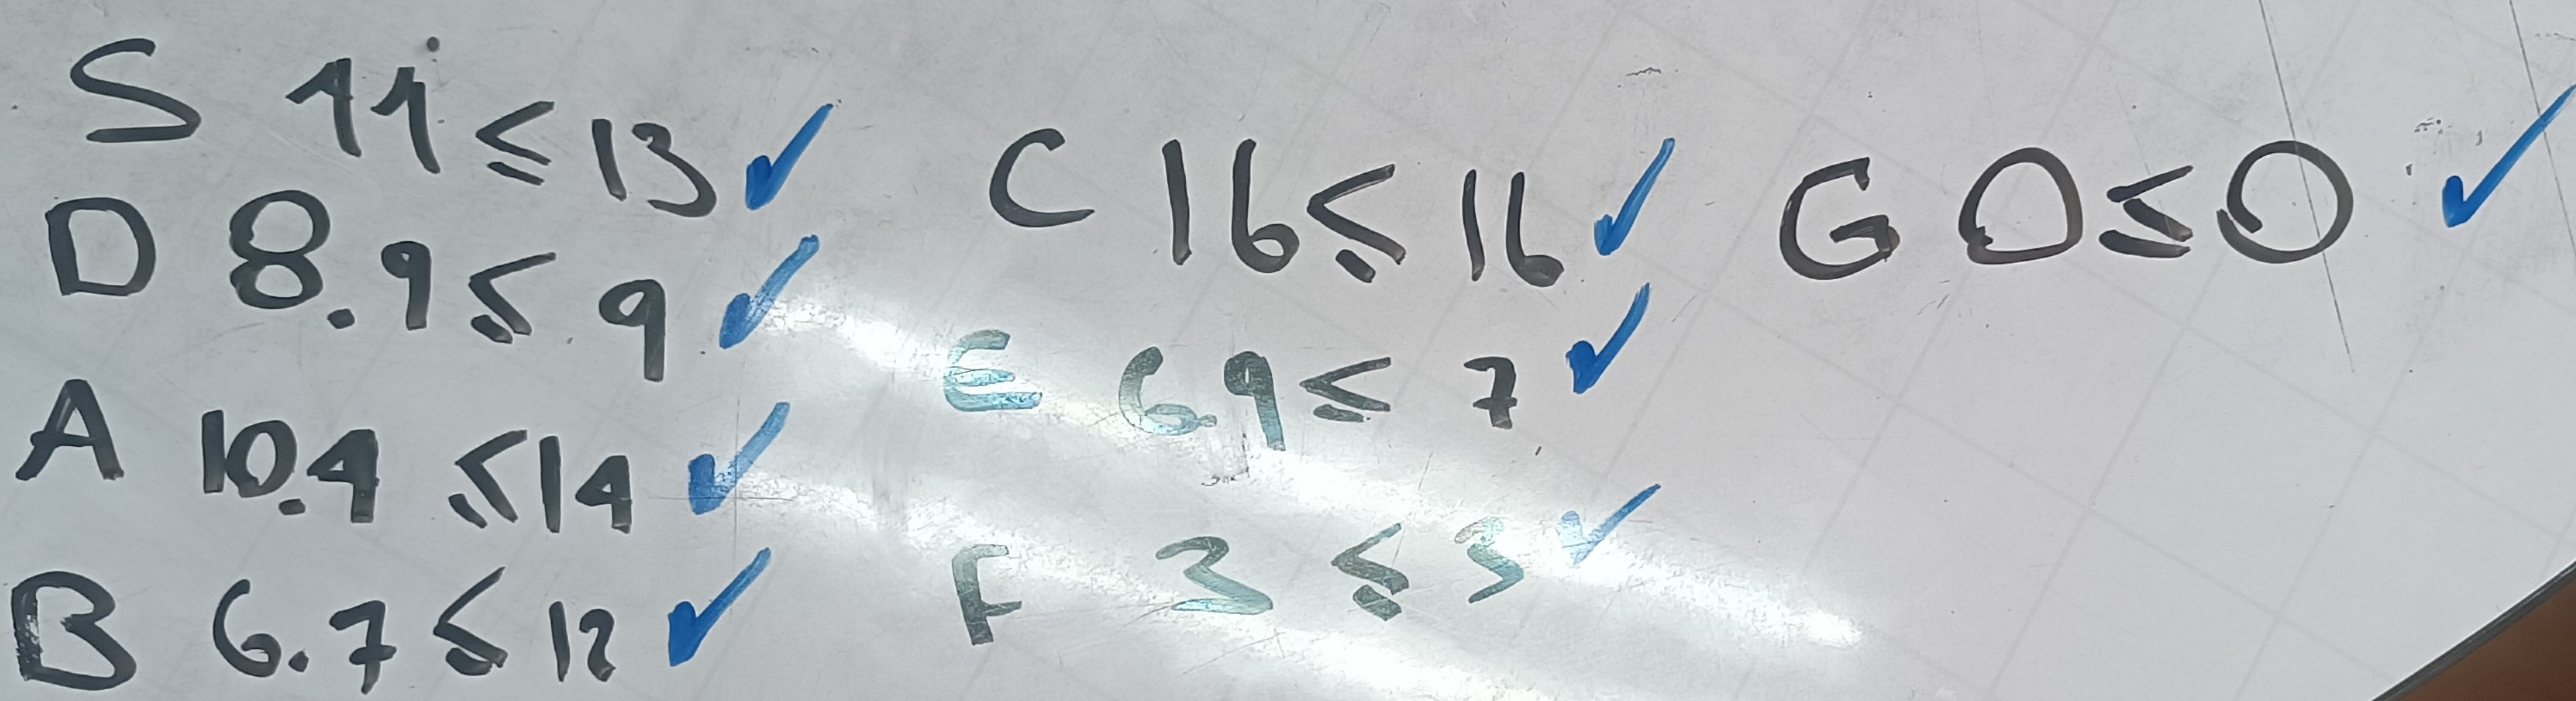

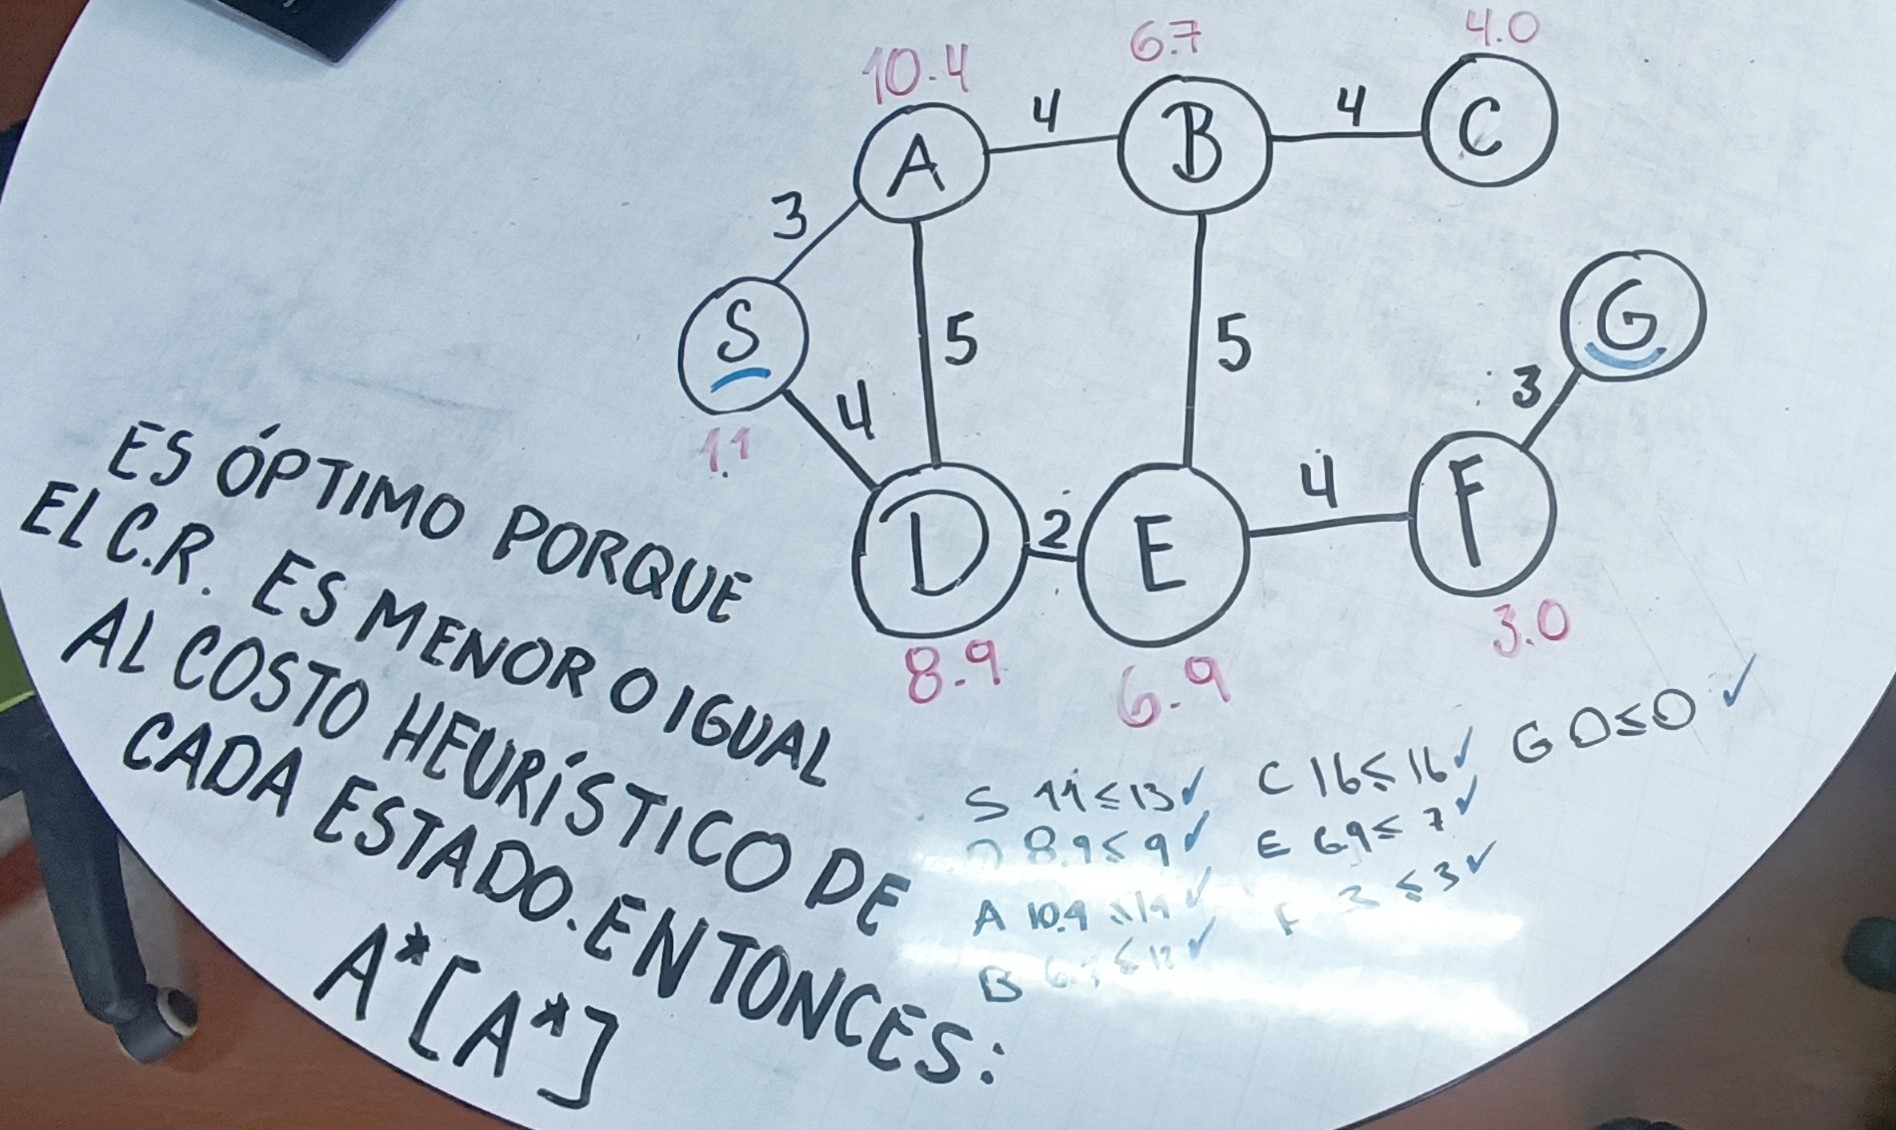

**B.** Búsqueda con adversario: Algoritmo Alpha-Beta.
Búsqueda con adversario: Algoritmo Alpha-Beta

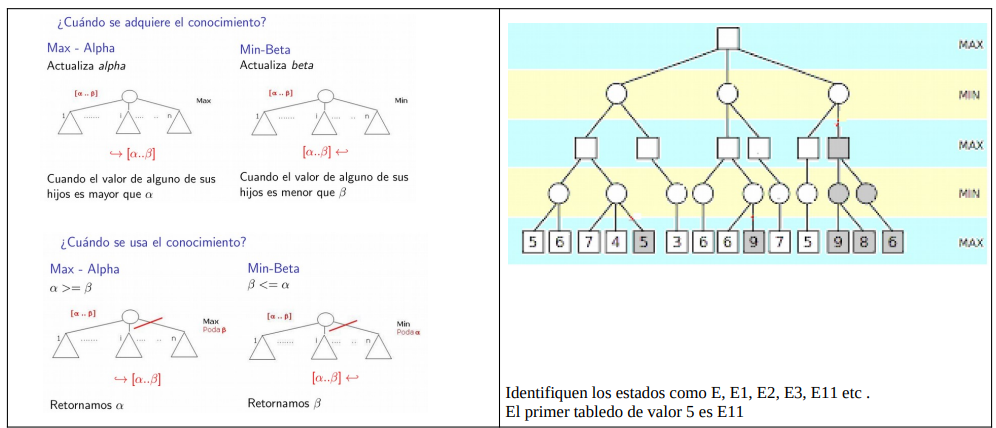

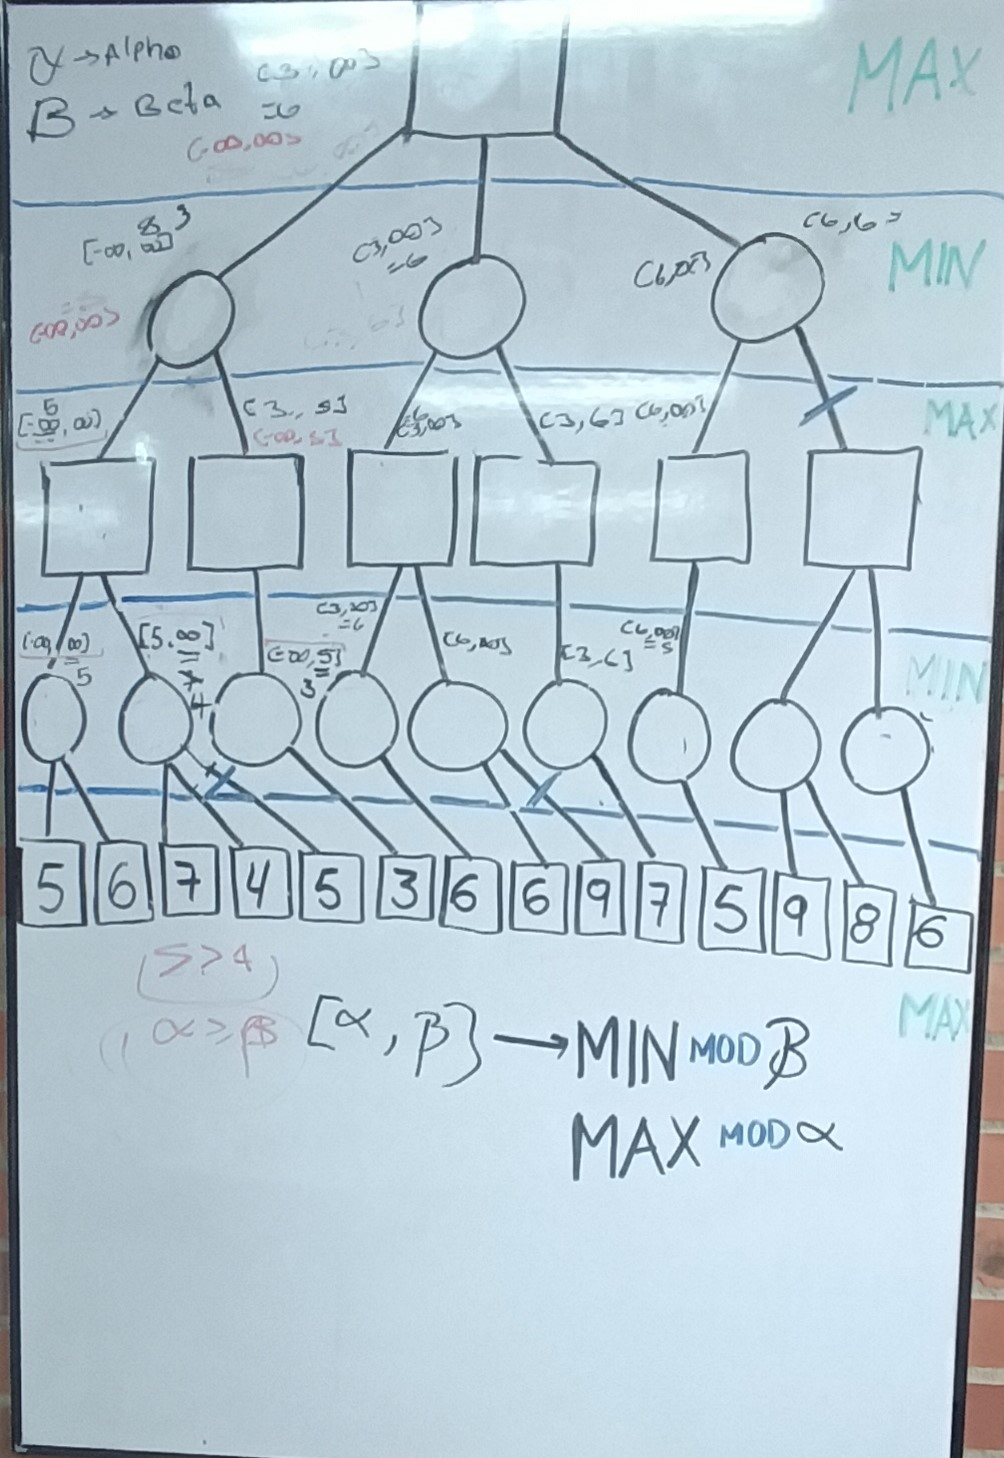


####**2.DESARROLLANDO. BÚSQUEDA SIN ADVERSARIO.**
**A.** Modelando. Ejemplo simple.

1. Modelen el espacio de búsqueda sin adversario de ejemplo



In [ ]:
estados={("S","A"):3,
          ("S","D"):4,
          ("A","S"):3,
          ("A","B"):4,
          ("A","D"):5,
          ("D","S"):4,
          ("D","A"):5,
          ("D","E"):2,
          ("B","A"):4,
          ("B","C"):4,
          ("B","E"):5,
          ("E","D"):2,
          ("E","B"):5,
          ("E","F"):4,
          ("C","B"):4,
          ("F","E"):4,
          ("F","G"):3,
          ("G","F"):3}

estadosHeuristicos={"A":10.4,
                    "B":6.7,
                    "C":4.0,
                    "D":8.9,
                    "E":6.9,
                    "F":3.0,
                    "G":0.0,
                    "S":11.0}

sucesores={"S":["A","D"],
           "A":["S","B","D"],
           "D":["S","A","E"],
           "B":["A","E","C"],
           "E":["D","B","F"],
           "C":["B"],
           "F":["E","G"],
           "G":["F"]}

2. Prueben el modelado adjuntando pantallas de prueba significativas.

In [ ]:
import math

def initial():
    return "S"

def actionResults(Tstate):
    return sucesores[Tstate]

def isGoal(TState):
    if(TState=="G"):
        return True
    return False

def actionCost(e1,e2):
    return estados[e1,e2]

def heuristicCost(e1):
    return estadosHeuristicos[e1]


print("Secuencia de nodos:",actionResults("D"))
print("Secuencia de nodos:",actionResults("S"))
print("Secuencia de nodos:",actionResults("B"))
print("Es la meta: ",isGoal("G"))
print("Es la meta: ",isGoal("S"))
print("Costo de la accion:",actionCost("B","C"))
print("Costo de la accion:",actionCost("C","B"))
print("Costo de la accion:",actionCost("B","A"))
print("Costo de la accion:",actionCost("A","B"))
print("Costo de la heuristico:",heuristicCost("B"))
print("Costo de la heuristico:",heuristicCost("D"))

Secuencia de nodos: ['S', 'A', 'E']
Secuencia de nodos: ['A', 'D']
Secuencia de nodos: ['A', 'E', 'C']
Es la meta:  True
Es la meta:  False
Costo de la accion: 4
Costo de la accion: 4
Costo de la accion: 4
Costo de la accion: 4
Costo de la heuristico: 6.7
Costo de la heuristico: 8.9


**B.** Implementando. A.
1. Implementen el algoritmo de búsqueda genérico.

In [ ]:
def bestNode(nodes,initialState,parent):
    maxi=math.inf
    best=""
    for node in nodes:
        if node!=parent and actionCost(initialState,node)+heuristicCost(node)<maxi:
            maxi=actionCost(initialState,node)+heuristicCost(node)
            best=node
    #print(initialState+" best node "+best)
    return best



def a(e, parentState=None, path=[]):
    nodes=actionResults(e)
    #print(nodes,e,parentState)
    #print(path)
    if isGoal(e):
        return path
    if nodes[0]==parentState and len(nodes)==1:
        return False
    while(True):
        aux = bestNode(nodes, e, parentState)
        if isGoal(e):
            return path
        if nodes[0] == parentState and len(nodes) == 1:
            return False
        path.append([e, aux])
        nodes.remove(aux)
        res=a(aux, e, path)
        if res!=False:
            return res


2. Prueben la implementación con el espacio de ejemplo.

In [ ]:
print(a("S"))


[['S', 'D'], ['D', 'E'], ['E', 'F'], ['F', 'G']]


####**3. DESARROLLANDO. BUSQUEDA CON ADVERSARIO**
**A.** Modelando. Ejemplo simple.
1. Modelen el espacio de búsqueda sin adversario.

El modelo se definio como estaba puesto en el lab de A a E y de manera E1, E2, E3,etc.



In [ ]:
class TreeNode(object):
    "Node of a Tree"
    def __init__(self, name='root',player=True,children=None,parent=None,value=0):
        self.name = name
        self.parent=parent
        self.player=player
        self.value=value
        self.children = []
        if children is not None:
            for child in children:
                self.add_child(child)

    def __repr__(self):
        return self.name

    def getValue(self):
        return self.value

    def setValue(self,value):
        self.value=value

    def getChildren(self):
        return self.children

    def getParent(self):
        return self.parent

    def getPlayer(self):
        return self.player

    def is_root(self):
        if self.parent is None:
            return True
        else:
            return False

    def is_leaf(self):
        if len(self.children) == 0:
            return True
        else:
            return False

    def depth(self):    # Depth of current node
        if self.is_root():
            return 0
        else:
            return 1 + self.parent.depth()

    def add_child(self, node):
        node.parent=self
        assert isinstance(node, TreeNode)
        self.children.append(node)

root=TreeNode("A1",True)

b1=TreeNode("B1",False,None,root)
b2=TreeNode("B2",False,None,root)
b3=TreeNode("B3",False,None,root)

root.add_child(b1)
root.add_child(b2)
root.add_child(b3)

c1=TreeNode("C1",True,None,b1)
c2=TreeNode("C2",True,None,b1)
c3=TreeNode("C3",True,None,b2)
c4=TreeNode("C4",True,None,b2)
c5=TreeNode("C5",True,None,b3)
c6=TreeNode("C6",True,None,b3)

b1.add_child(c1)
b1.add_child(c2)
b2.add_child(c3)
b2.add_child(c4)
b3.add_child(c5)
b3.add_child(c6)

d1=TreeNode("D1",False,None,c1)
d2=TreeNode("D2",False,None,c1)
d3=TreeNode("D3",False,None,c2)
d4=TreeNode("D4",False,None,c3)
d5=TreeNode("D5",False,None,c3)
d6=TreeNode("D6",False,None,c4)
d7=TreeNode("D7",False,None,c5)
d8=TreeNode("D8",False,None,c6)
d9=TreeNode("D9",False,None,c6)

c1.add_child(d1)
c1.add_child(d2)
c2.add_child(d3)
c3.add_child(d4)
c3.add_child(d5)
c4.add_child(d6)
c5.add_child(d7)
c6.add_child(d8)
c6.add_child(d9)


e1=TreeNode("E1",True,None,d1,5)
e2=TreeNode("E2",True,None,d1,6)
e3=TreeNode("E3",True,None,d2,7)
e4=TreeNode("E4",True,None,d2,4)
e5=TreeNode("E5",True,None,d2,5)
e6=TreeNode("E6",True,None,d3,3)
e7=TreeNode("E7",True,None,d4,6)
e8=TreeNode("E8",True,None,d5,6)
e9=TreeNode("E9",True,None,d5,9)
e10=TreeNode("E10",True,None,d6,7)
e11=TreeNode("E11",True,None,d7,5)
e12=TreeNode("E12",True,None,d8,9)
e13=TreeNode("E13",True,None,d8,8)
e14=TreeNode("E14",True,None,d9,6)

d1.add_child(e1)
d1.add_child(e2)
d2.add_child(e3)
d2.add_child(e4)
d2.add_child(e5)
d3.add_child(e6)
d4.add_child(e7)
d5.add_child(e8)
d5.add_child(e9)
d6.add_child(e10)
d7.add_child(e11)
d8.add_child(e12)
d8.add_child(e13)
d9.add_child(e14)

def inital():
    return root.getValue()

def actionResult(TState):
    return TState.getChildren()

def isTerminal(TState):
    return TState.is_leaf()

def player(TState):
    return TState.getPlayer()

#Preguntar
def rival(TState):
    return not TState.getPlayer()

#Preguntar
def heuristicEval(TState,TPlayer):
    return TState.getValue()

2. Prueben el modelado adjuntando pantallas de prueba significativas.

In [ ]:
print("Secuecia de acciones (nodos):",root,actionResult(root))
print("Secuecia de acciones (nodos):",b2,actionResult(b2))
print("Nodo terminal:",b2,isTerminal(b2))
print("Nodo terminal:",e1,isTerminal(e1))
print("Jugador (min o max):",d2,player(d2))

3. ¿Qué se requiere para que el algoritmos se comporte como un A*?

**B.** Implementando. A.
1. Implementen el algoritmo de búsqueda genérico.

Implementacion de minmax y de alphabeta

In [ ]:
def minMaxBetaDecision(TState,d):
    estado=None
    max=-math.inf
    lista=actionResult(TState)
    for state in lista:
        aux=minValue(state,d-1)
        if aux>max:
            max=aux
            estado=state
    return estado

def alphaBetaDecision(TState,d):
    estado=None
    max=-math.inf
    lista=actionResult(TState)
    for state in lista:
        aux=minValueAB(state,d-1,-math.inf,math.inf)
        if aux>max:
            max=aux
            estado=state
    return estado



def minValue(t,d):
    if d==0 or isTerminal(t):
        valor=heuristicEval(t,player(t))
        #print(t, valor)
    else:
        min=math.inf
        lista=actionResult(t)
        for state in lista:
            aux=maxValue(state,d-1)
            if aux< min:
                min=aux
        valor=min
        #print(t, valor, "min")
    return valor

def minValueAB(t,d,alpha,beta):
    #print(t,"Alpha: "+str(alpha)+", Beta: "+ str(beta))
    if d==0 or isTerminal(t):
        valor=heuristicEval(t,player(t))
        #print(t, valor)
    else:
        lista=actionResult(t)
        for state in lista:
            beta=min(beta,maxValueAB(state,d-1,alpha,beta))
            if beta < alpha:
                #print(t, alpha, "min")
                return alpha
        valor=beta
        #print(t, valor, "min")
    return valor

def maxValue(t,d):
    if d == 0 or isTerminal(t):
        valor = heuristicEval(t, player(t))
        #print(t, valor)
    else:
        max=-math.inf
        lista = actionResult(t)

        for state in lista:
            aux=minValue(state,d-1)
            if aux >max:
                max=aux
        valor=max
        #print(t, valor, "max")
    return valor

def maxValueAB(t,d,alpha,beta):
    #print(t,"Alpha: "+str(alpha)+", Beta: "+ str(beta))
    if d == 0 or isTerminal(t):
        valor = heuristicEval(t, player(t))
        #print(t, valor)
    else:
        lista = actionResult(t)
        for state in lista:
            alpha=max(alpha,minValueAB(state,d-1,alpha,beta))
            if alpha>=beta:
                #print(t, beta, "max")
                return beta
        valor=alpha
        #print(t, valor, "max")
    return valor

2. Prueben la implementación con el espacio de ejemplo.

In [ ]:
print(minMaxBetaDecision(root,4))
print(alphaBetaDecision(root,4))

B2
B2


####**3.ENTRENANDO (HackerRank)**

**A.** Solucionando. Pacman A*.

1. Presenten el diseño: estado y heurístico.
**ESTADO:**

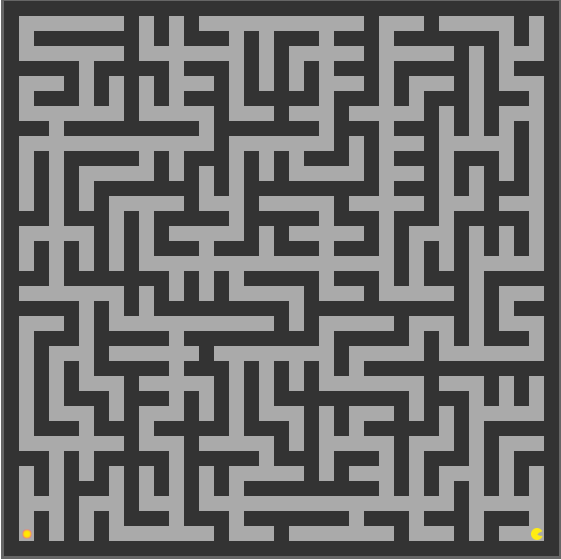

**HEURÍSTICO:**

Heurístico = distanciaLineaRecta (posicionActual, posicionObjetivo)

2. Solucionen el problema.
3. Adjunten evidencia de la solución.
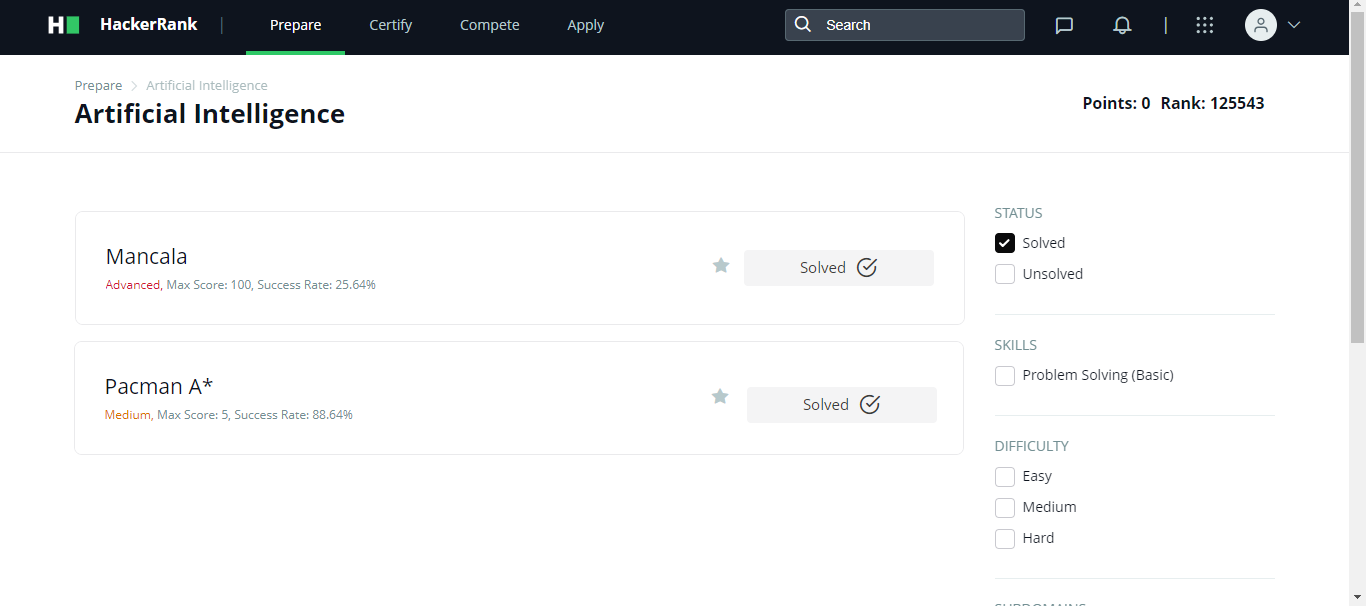
4. Compitan en HackerRank. Presenen resultados de competición.

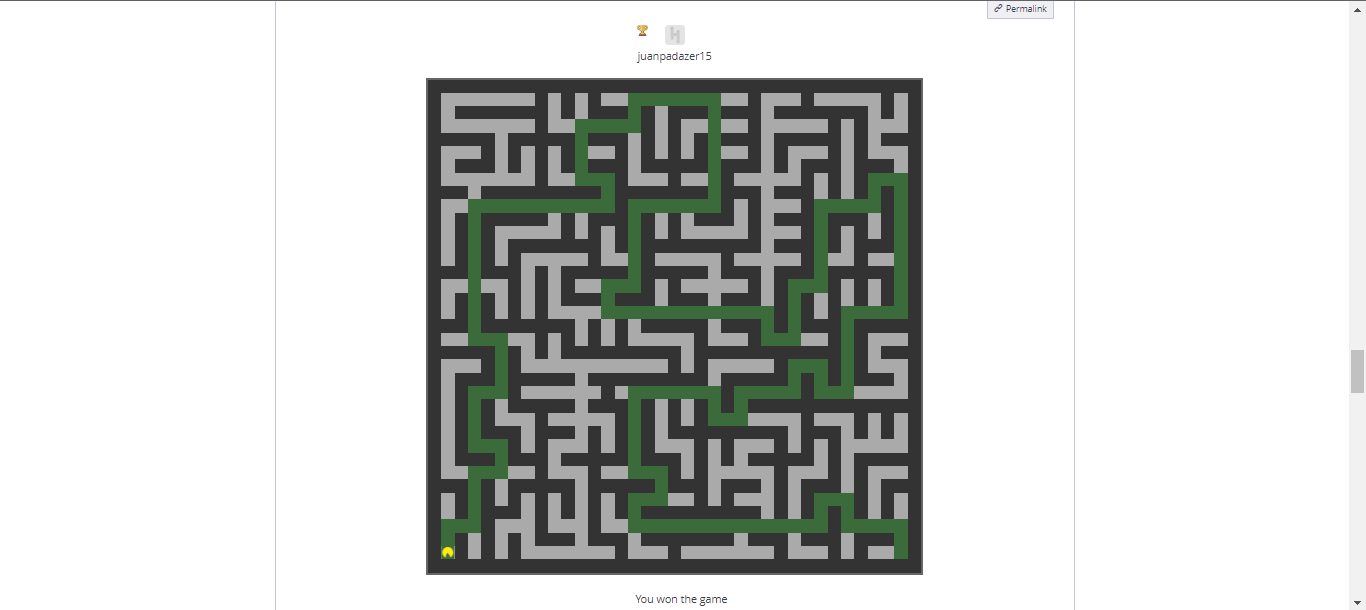

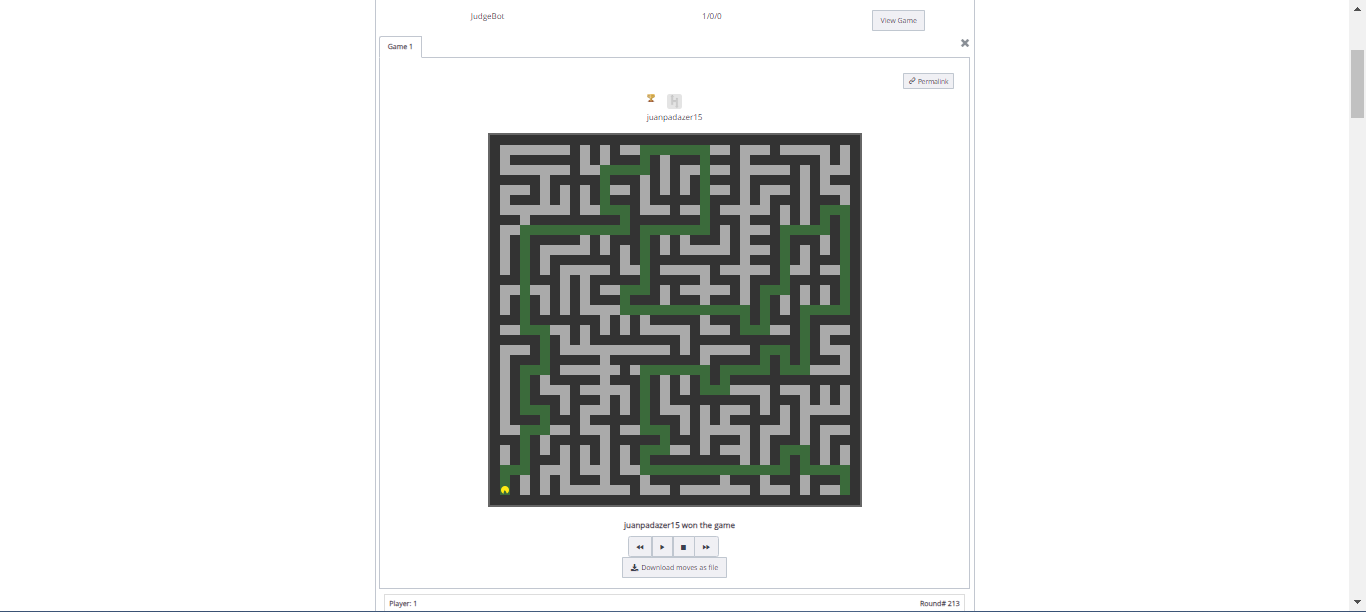

**B.** Solucionando. Mancala.
1. Presenten el diseño: tablero y heurístico.
**TABLERO:**

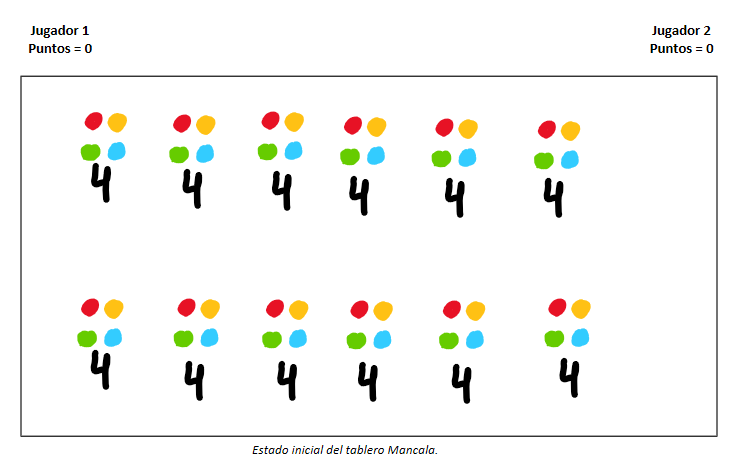

**HEURÍSTICO:**

Heurístico = (puntajePersonal - puntajeOponente) + (numeroSemillasMancalaPersonal - numeroSemillasMancalaOponente)

2. Solucionen el problema.
3. Adjunten evidencia de la solución.
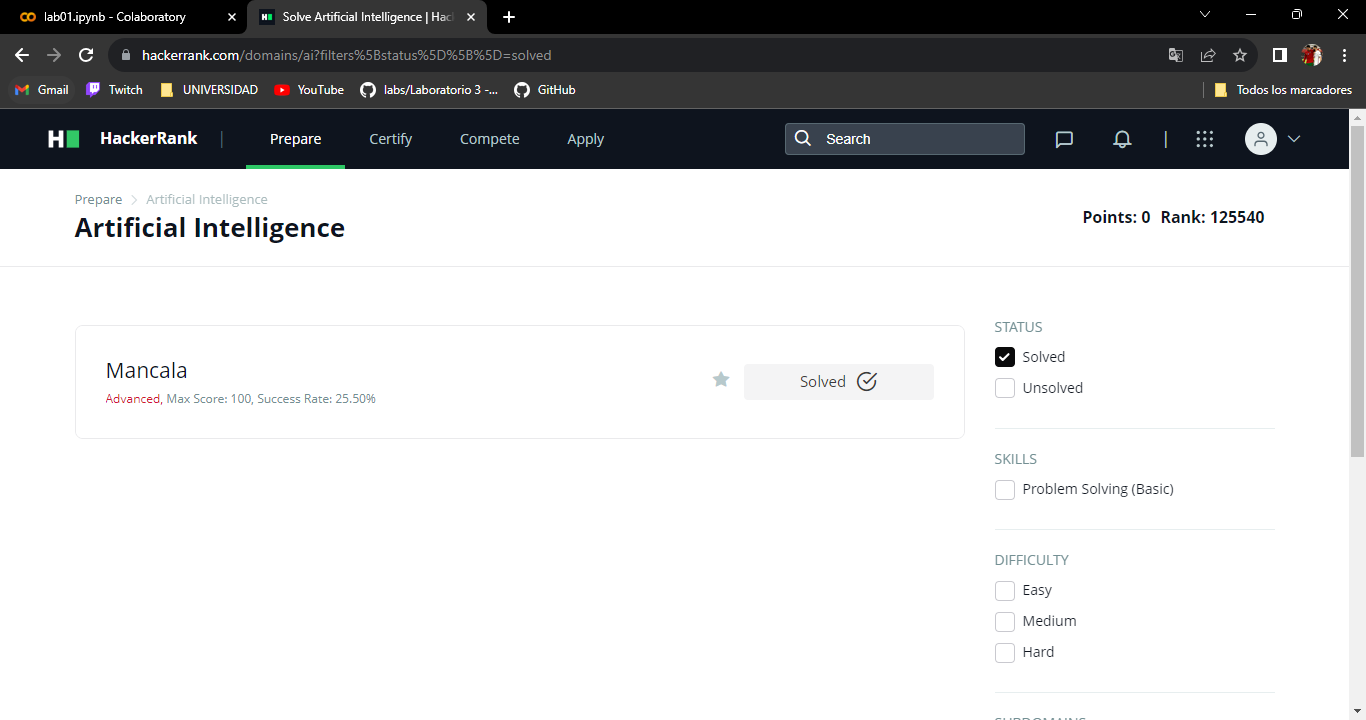
4. Compitan en HackerRank. Presenten resultados de competición.
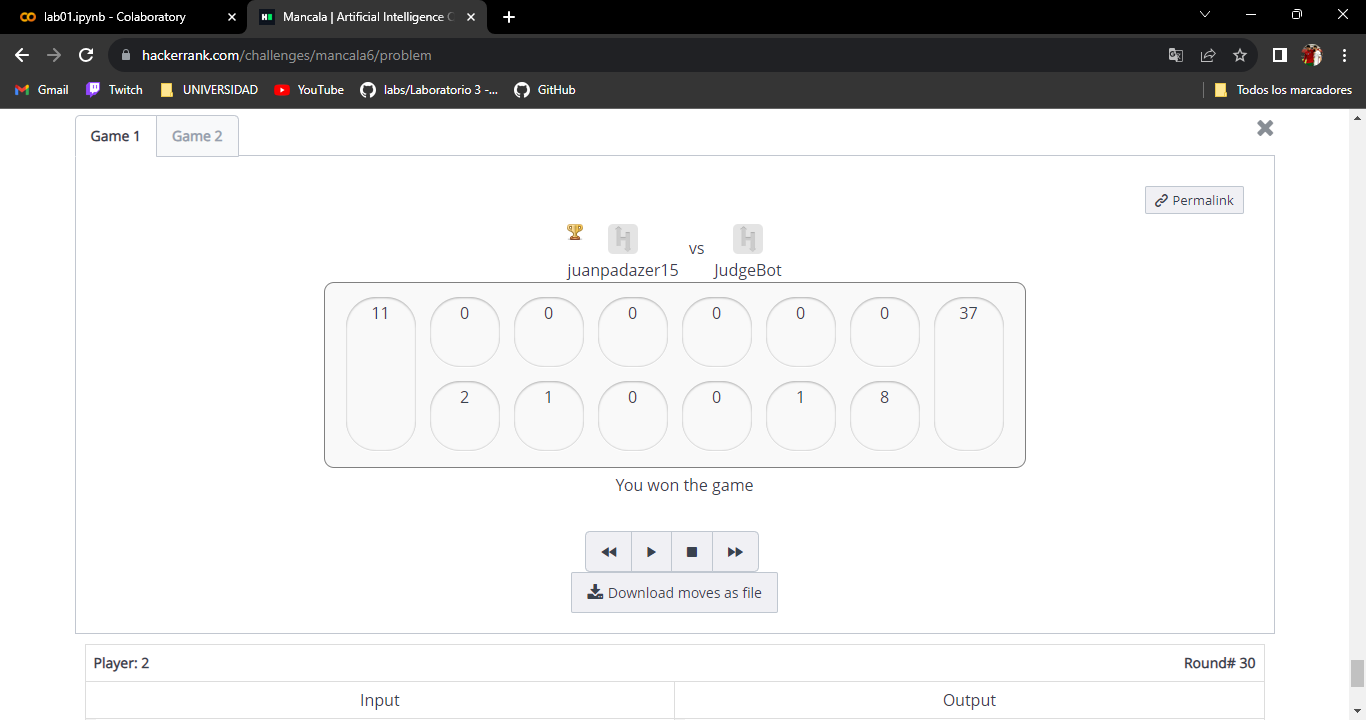

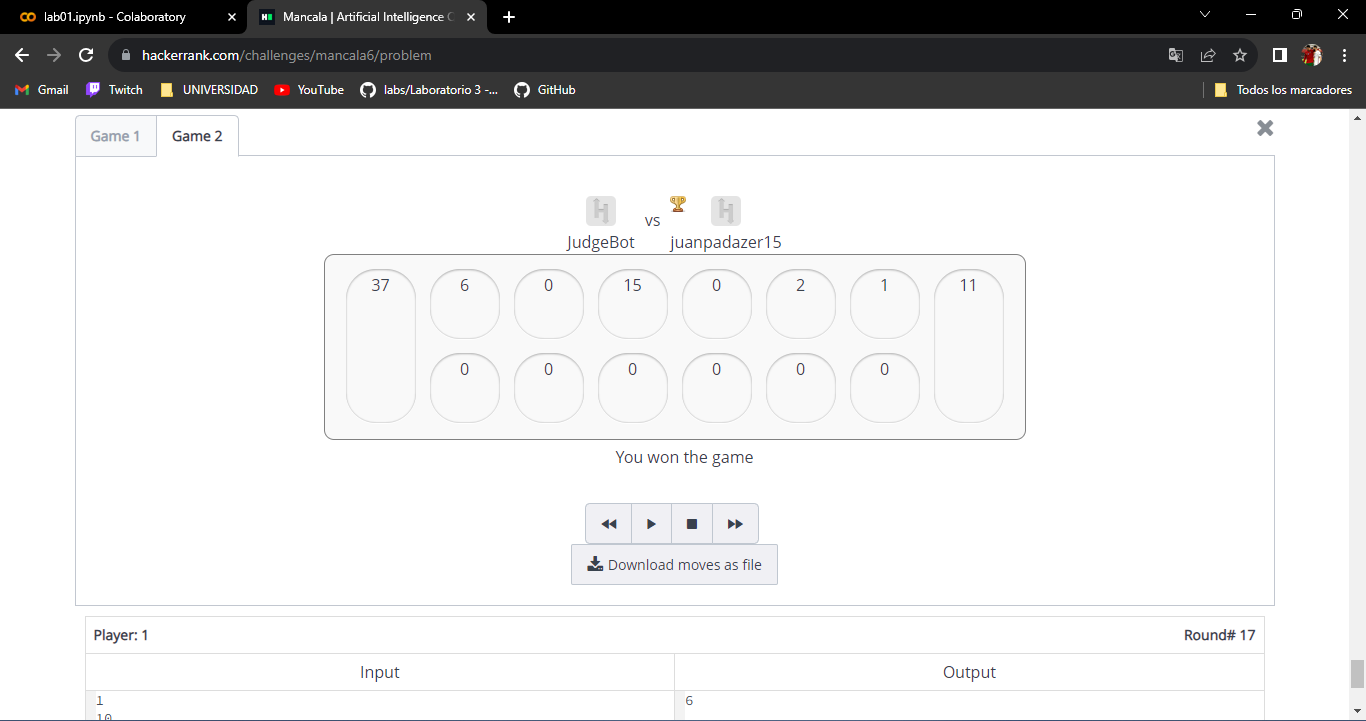

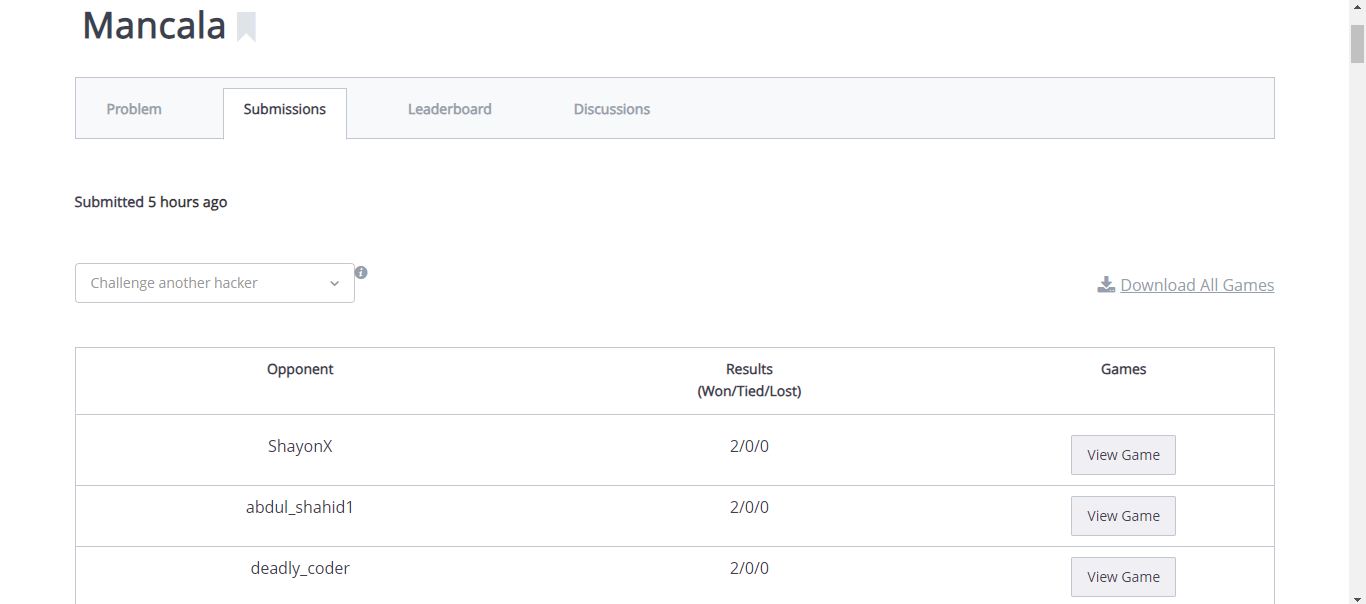

**4.DISEÑANDO**

Para uno de los motores de búsqueda (A, alpha-beta) diseñe un framework que permita resolver los dos problemas (ejemplo y hacker rank) usando el mismo código.

**RETROSPECTIVA:**

**1.** ¿Cuál fue el tiempo total invertido en el laboratorio por cada uno de ustedes?
(Horas/Nombre)

- **Juan Pablo: 20 horas.**
- **Juan Sebastian: 20 horas.**

**2.** ¿Cuál es el estado actual del laboratorio? ¿Por qué?

**RTA:** Falta el último punto de "Diseñando". Éste punto faltó porque era muy extenso resolver, tenías las ideas muy cortas para resolverlo, y el tiempo no nos alcanzó porque dejamos éste punto pára última hora.

**3.** ¿Cuál consideran fue el mayor logro? ¿Por qué?

**RTA:** Nuestro mayor logro fue poder resolver los problemas de HackerRank ya que estos eran muy complejos y necesitaban de tiempo para ser solucionados.

**4.** ¿Cuál consideran que fue el mayor problema técnico? ¿Qué hicieron para resolverlo?

**RTA:** El mayor problema fue la dificultad a la hora de implementar cada caso. Lo que hicimos fue guiarnos del libro guía y de los ejemplo de los primeros puntos para entender mejor.


**5.** ¿Qué hicieron bien como equipo? ¿Qué se comprometen a hacer para mejorar los
resultados?

**RTA:** Poder resolver un laboratorio tan extenso y con cierta dificultad, ordenando los tiempos de cada uno para realizar el laboratorio, además de que cada uno nos apoyamos en los problemas que iban surgiendo.
Nos comprometemos a mejorar la calidad de las entregas, y a distribuir mejor el tiempo para la realización de los laboaratorios.
